**Exercise 2 - Linear and non-linear regression**

---

This exercise will be about linear and non-linear regression. Given a set of data points your task will be to implement the functions that calculate the function $\theta$ parameters to fit the data.

In [1]:
# import libraries used during this exercise
# it may be necessary to uncomment the two following pip commands
# !pip install pandas
# !pip install matplotlib
import pandas as pd
import numpy as np
from mlrcv.core import *
%matplotlib notebook
%matplotlib inline

In this exercise we will use a toy dataset with $x$ and $y$ values, where the $x$ is the observed data that should be used to predict the $y$ values. To predict the $y$ values you should implement the Maximum Likelihood Estimation method.

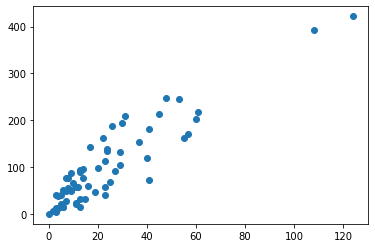

In [2]:
# Dataset read
df = pd.read_csv('data/linear.csv')
x = df['X'].values
y = df['Y'].values

plot_regression(x, y)

**2.1 Linear regression \[4\]**

---

In this first task, given the loaded data *x* and *y* you should implement the *LinearRegression* class functions in the *mlrcv/regression.py* file to calculate the $\theta_0$ and $\theta$ parameters of the linear function $ f(x) = x^T\theta + \theta_0$ that will fit the data:
- *calculate_theta*
- *predict_y*

You should first implement *split_train_test* in *mlrcv/utils.py* to split your dataset in train and validation sets. Usually the data is splitted in train, validation and test sets, but in this exercise we are working with a small simple dataset so we will abstract this and split only on train and validation sets.
(**Note:** The *plot_regression* function is already implemented.)

In [3]:
from mlrcv.regression import *
from mlrcv.utils import *

# split the data
x_train, y_train, x_val, y_val = split_data(x, y)

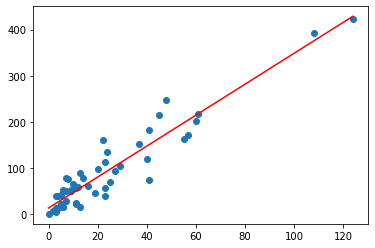

In [4]:
model = LinearRegression()
model.calculate_theta(x_train, y_train)
y_pred = model.predict_y(x_train)

plot_regression(x_train, y_train, y_pred)

If your implementation have worked, you should see in the plot a red line passing right on the middle of your data, that line is your regression model, which predict a *y* given an input *x*.


**2.2 Non-linear regression \[4\]**

---

In some cases your data may not have a linear relation, which means that linear regression may not correctly fit your data. In this second task you should deal with non-linear regression.

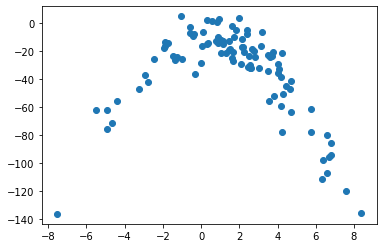

In [5]:
# Dataset read
df = pd.read_csv('data/non_linear.csv')
x = df['X'].values
y = df['Y'].values

plot_regression(x, y)

If you run the same implementations from the last task, you should see that the regression model can not properly fit non-linear data.

In [6]:
x_train, y_train, x_val, y_val = split_data(x, y)

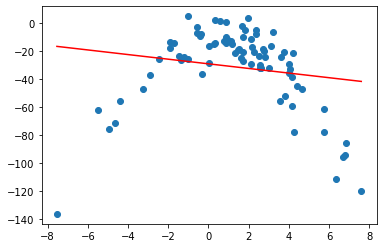

In [7]:
model = LinearRegression()
model.calculate_theta(x_train, y_train)
y_pred = model.predict_y(x_train)
plot_regression(x_train, y_train, y_pred)

For that, a non-linear regression should be implemented in order to fit non-linear data. In the next task you should implement the functions from the *NonLinearRegression* class to calculate the $\theta$ parameters (now it will be a vector of parameters) of the regression function $f(x) = \phi(x)^T\theta$ for non-linear data, where $\phi$ is a non-linear transformation, e.g. polynomial transformation. Your implementation should be able to build a model for *n-degree* polynoms, where the polynom degree will be passed as argument.

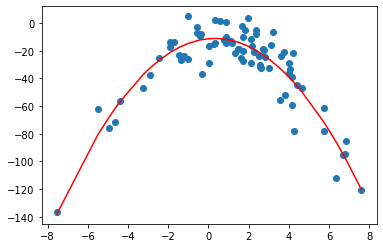

In [8]:
from mlrcv.regression import *

model = NonLinearRegression()
model.calculate_theta(x_train, y_train, degree=2)
y_pred = model.predict_y(x_train)

plot_regression(x_train, y_train, y_pred)

If you have implemented it correctly you should se a curved line passing over your data. The non-linear regression fits better our non-linear data since now our model is a polynom and not just a line anymore.

**2.3 Evaluating your model \[2\]**

---

With a non-linear regression model you can increase your polynom degree to improve even more your model. In this task you should implement the root mean square error (RMSE) metric in *mlrcv/utils.py* and evaluate your model with different polynomial degrees (where $\overline{y}$ is the prediction from your model):


$ RMSE(y, \overline{y}) = \sqrt{\frac{1}{N}\sum_{n=1}^{N} (y_n - \overline{y_n})^2} $

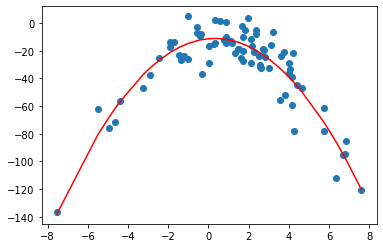

Degree: 2	RMSE train: 11.152868	RMSE val: 9.195547


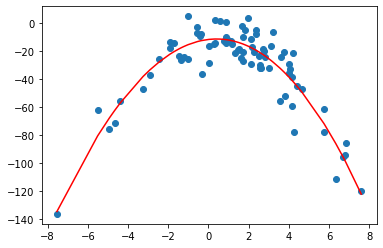

Degree: 3	RMSE train: 11.134207	RMSE val: 9.317046


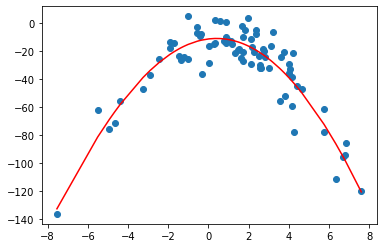

Degree: 4	RMSE train: 11.124019	RMSE val: 9.098392


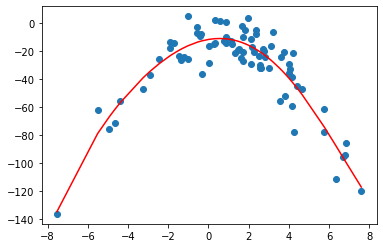

Degree: 5	RMSE train: 11.089441	RMSE val: 8.795188


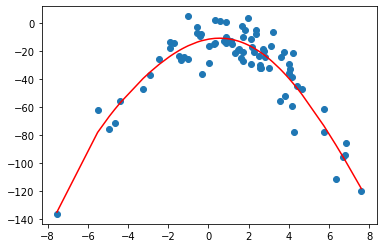

Degree: 6	RMSE train: 11.086235	RMSE val: 8.804681


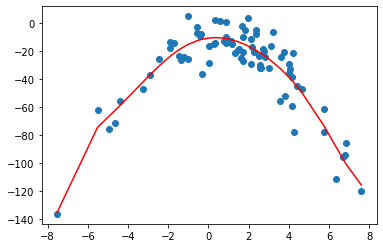

Degree: 7	RMSE train: 11.043948	RMSE val: 9.696388


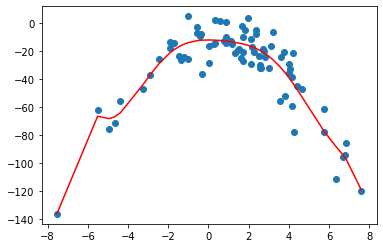

Degree: 8	RMSE train: 10.853455	RMSE val: 15.385646


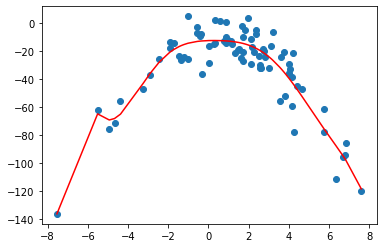

Degree: 9	RMSE train: 10.838831	RMSE val: 9.703926


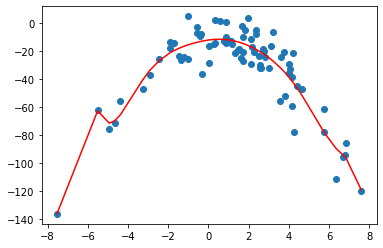

Degree: 10	RMSE train: 10.789363	RMSE val: 32.164177


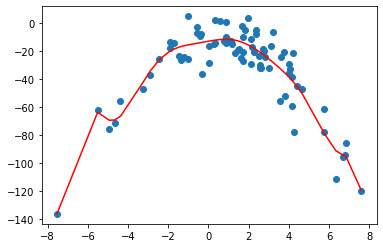

Degree: 11	RMSE train: 10.762836	RMSE val: 73.840898


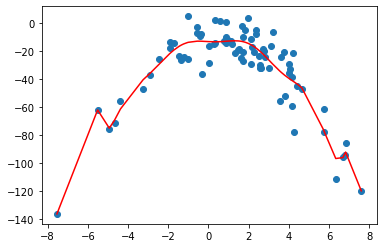

Degree: 12	RMSE train: 10.634284	RMSE val: 298.975737


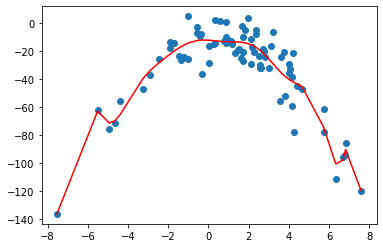

Degree: 13	RMSE train: 10.581001	RMSE val: 574.288747


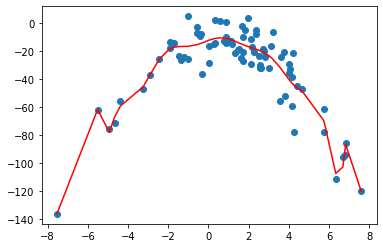

Degree: 14	RMSE train: 10.271499	RMSE val: 1778.582262


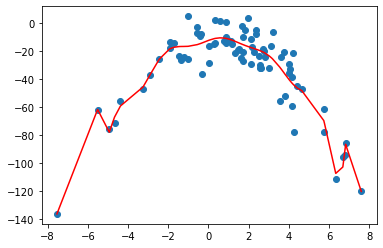

Degree: 15	RMSE train: 10.271498	RMSE val: 1775.167512


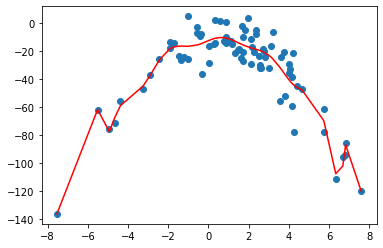

Degree: 16	RMSE train: 10.268151	RMSE val: 1133.834319


In [9]:
from mlrcv.regression import *

##################################################################################
# call here your functions. You should:
# - calculate the function parameters theta (vector of thetas)
# - infer the y_val_pred values given x_val and the calculated theta with degree=d
# - calculate the RMSE for the model
##################################################################################

for d in range(2,17):
    model = NonLinearRegression()
    model.calculate_theta(x_train, y_train, degree=d)
    y_pred = model.predict_y(x_train)

    plot_regression(x_train, y_train, y_pred)
    y_val_pred = model.predict_y(x_val)
    # print root mean square error for train and validation sets
    train_rmse = rmse(y_train, y_pred)
    val_rmse = rmse(y_val, y_val_pred)
    print('Degree: %d\tRMSE train: %f\tRMSE val: %f' % (d, train_rmse, val_rmse))

From the plots above you can notice that, as the polynom degree increase, the train RMSE value decrease, however for the validation set the RMSE increases. Why does this happen?

- *The root of the issue is overfitting.As the degree of the polynomial increases, the model becomes more intricate and more prone to overfit the training set of data. As a result, as the degree of the polynomial increases, the training RMSE decreases. When we test the model using validation data that it has never seen before, however, we can discover that it is unable to generalize well and that the validation RMSE grows. This happens as a result of overfitting, which causes the model to focus on the noise in the training set rather than the underlying patterns. The model cannot generalize to new data as a result, which increases the validation RMSE*

**Assignment Submission**

---

You should zip and submit the ```ex2_regression.ipynb``` file together with all the ```.py``` files inside the ```mlrcv/``` directory.

You can automatically generate the submission file using the provided ```zip_submission.sh``` script by running:

```
bash zip_submission.sh
```

This will zip the necessary files for your submission and generate the ```ex2_mlrcv_submission.zip``` file to be submit via ecampus.